# Description
Predicting Prices for the products to be sold on Black Friday in US using Regression Analysis, Feature Engineering, Feature Selection, Feature Extraction and Data analysis - Data Visualizations.

Description The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

The dataset we are going to use is the Black Friday dataset from Kaggle which contains about 550068 rows and 12 features.  
The dataset contains the labels which we have to predict and the labels are continuous. So the problem we have is a Supervised Regression type.


## Step 0: Import libraries and dataset

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [201]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Step 1: Descriptive analysis

In [202]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [203]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [204]:
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Training data: 
Rows: 550068 Columns: 12


In [205]:
print('Testing data: \nRows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Testing data: 
Rows: 233599 Columns: 11


In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [207]:
# Statistical summary
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [208]:
# Checking for Null values
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [209]:
#No of Null Values
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [210]:
# Checking the counts of unique values
round((train['Age'].value_counts(normalize = True) * (100)), 2).astype(str) + ' %'

26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: Age, dtype: object

In [211]:
# Checking the counts of unique values
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True) * (100)), 2).astype(str) + ' %'

1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

<AxesSubplot:xlabel='Purchase'>

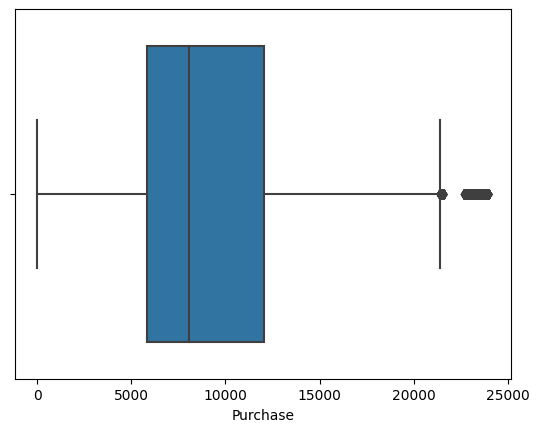

In [212]:
sns.boxplot(train['Purchase'])#outliers present

# Observations
The feature 'Product_Category_2' contains 31.57% null values which can be imputed whereas 'Product_Category_3' contains 69.67% null values so we can drop this feature.
The features 'Age' and 'Stay_In_Current_City_Years' contain some values which have '+' in them which need to be replaced.
  

## Step 2: Exploratory Data Analysis

### 2.1 Univariate Analysis

Text(0.5, 1.0, 'Purchase amount Distribution')

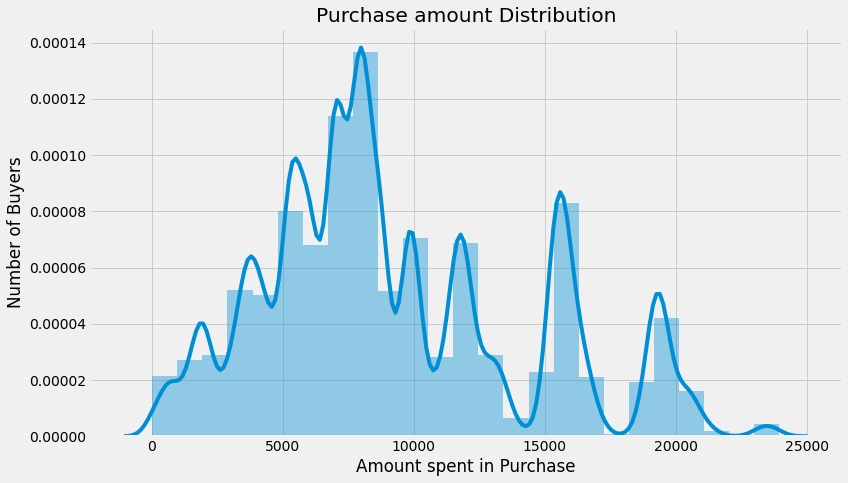

In [35]:
# Creating a distplot for dependent feature 'Purchase'
plt.figure(figsize=(12,7))
sns.distplot(train.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

It seems like our target variable has an almost Gaussian distribution/ Normal Distribution.

Now that we’ve analysed our target variable, let’s consider our predictors(IV). Let’s start by seeing which of our features are numeric.

In [36]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

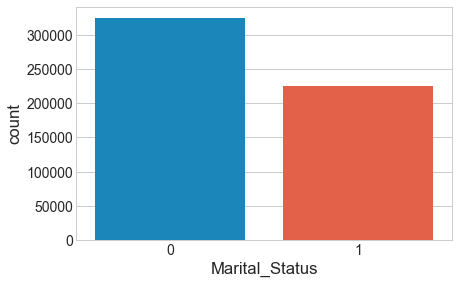

In [41]:
# Creating a countplot for 'Marital_Status'
sns.countplot(train.Marital_Status)#As expected there are more single people buying products on Black Friday than married people



<AxesSubplot:xlabel='Gender', ylabel='count'>

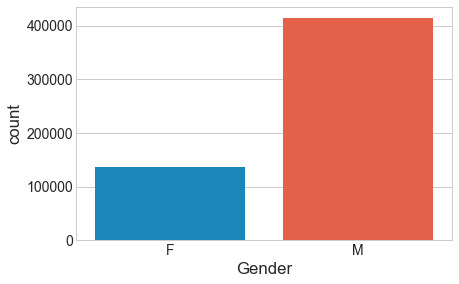

In [43]:
# Creating a countplot for 'Gender'
sns.countplot(train.Gender)#more men are purchasing on black friday

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

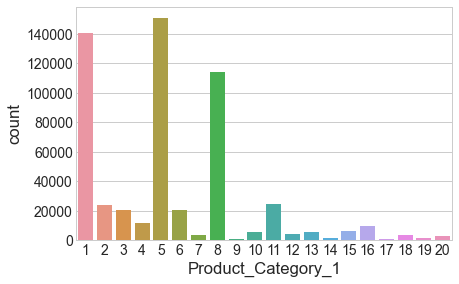

In [45]:
#Distribution of the variable Product_Category_1
sns.countplot(train.Product_Category_1)


From the distribution for products from category one, it is clear that three products stand out, number 1, 5 and 8. Unfortunately, we do not know which product each number represents

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2.0'),
  Text(1, 0, '3.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '5.0'),
  Text(4, 0, '6.0'),
  Text(5, 0, '7.0'),
  Text(6, 0, '8.0'),
  Text(7, 0, '9.0'),
  Text(8, 0, '10.0'),
  Text(9, 0, '11.0'),
  Text(10, 0, '12.0'),
  Text(11, 0, '13.0'),
  Text(12, 0, '14.0'),
  Text(13, 0, '15.0'),
  Text(14, 0, '16.0'),
  Text(15, 0, '17.0'),
  Text(16, 0, '18.0')])

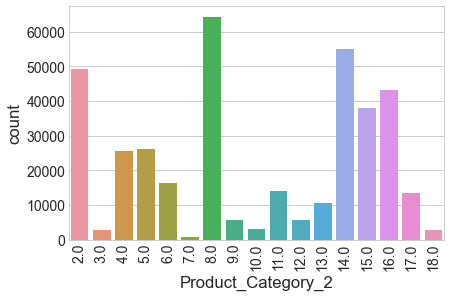

In [50]:
sns.countplot(train.Product_Category_2)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Age', ylabel='count'>

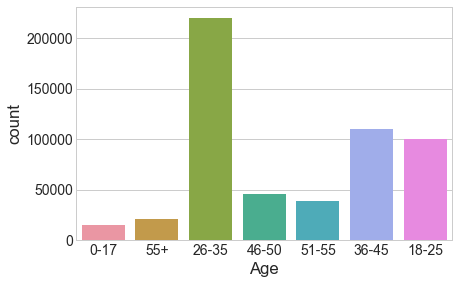

In [51]:
sns.countplot(train.Age)#most purchases are made by people between 26 to 35 years old.

<AxesSubplot:xlabel='City_Category', ylabel='count'>

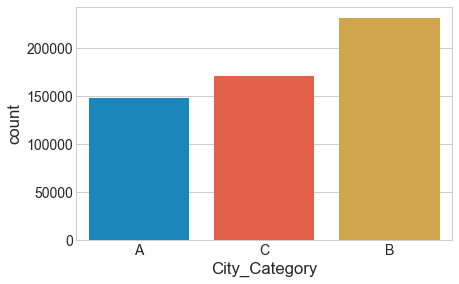

In [52]:
sns.countplot(train.City_Category)#most of the buyers are from city B

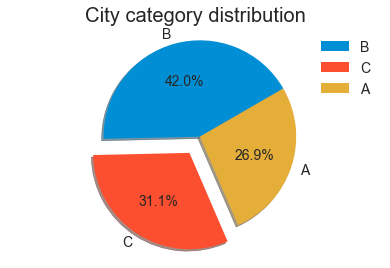

In [57]:
# Creating a pie chart for 'City Category'
city = train['City_Category'].value_counts()
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.20, 0), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution')
plt.legend()
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

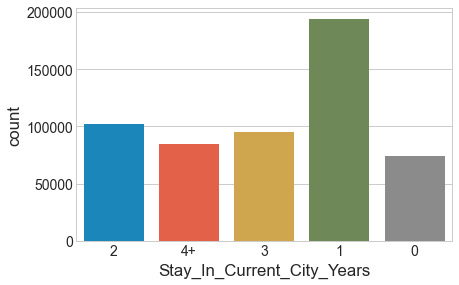

In [58]:
sns.countplot(train.Stay_In_Current_City_Years)

The tendency looks like the longest someone is living in that city the less chance they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

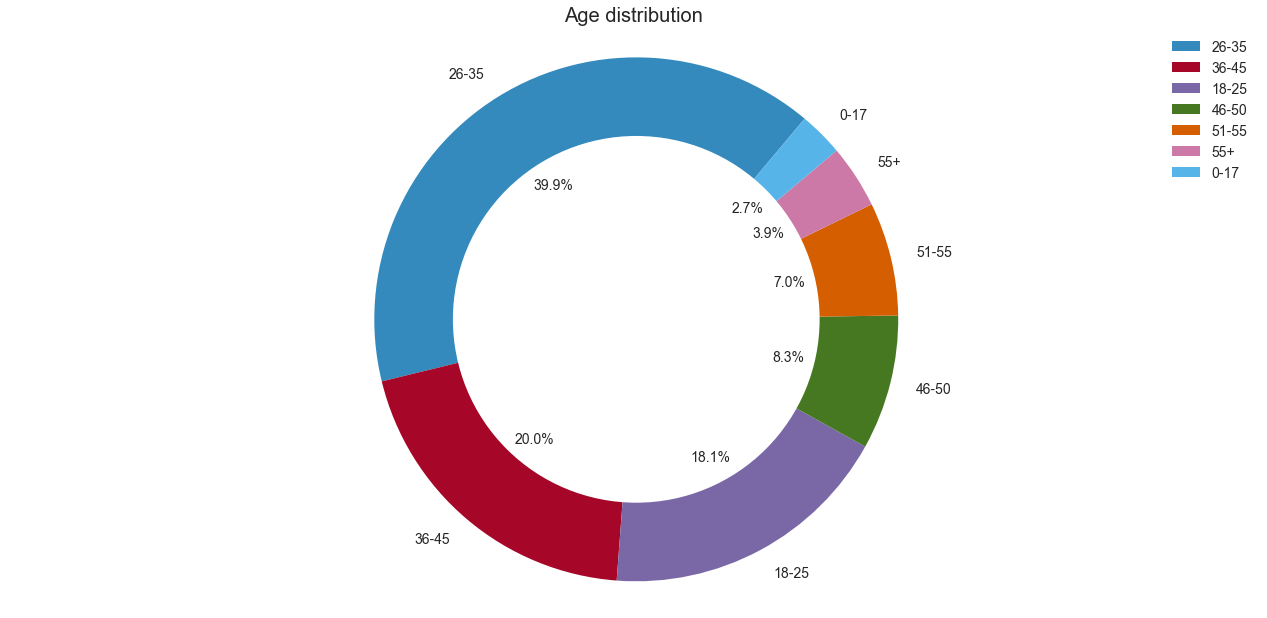

In [59]:
# Creating a donut chart for 'Age'
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution')
plt.axis('equal')
plt.legend()
plt.show()

now it is time to understand the relationship between our target variable and predictors as well as the relationship among predictors.

### 2.2 Bivariate Analysis

In [60]:
marital_status_pivot= train.pivot_table(index='Marital_Status',values='Purchase', aggfunc=np.mean)
marital_status_pivot

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


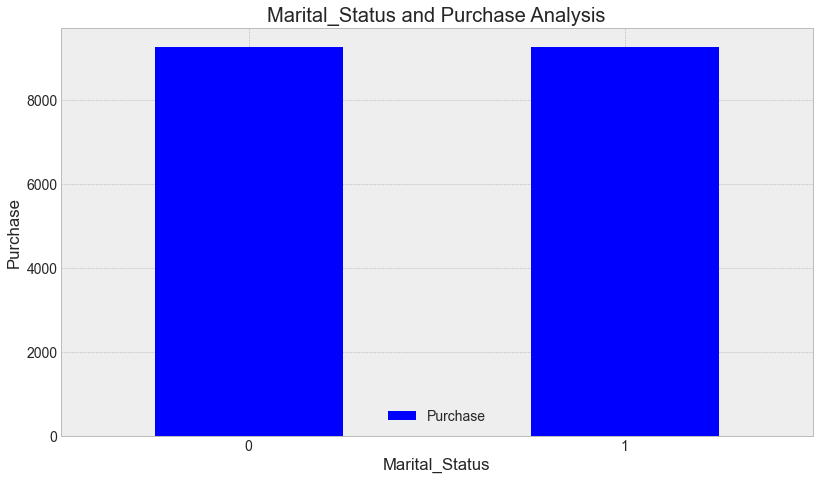

In [61]:
marital_status_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

We had more single customers than married. However, on average an individual customer tends to spend the same amount independently if his/her is married or not

In [62]:
Product_category_1_pivot = train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
Product_category_1_pivot

,Purchase
Product_Category_1,
1,13606.218596
2,11251.935384
3,10096.705734
4,2329.659491
5,6240.088178
6,15838.478550
7,16365.689600
8,7498.958078
9,15537.375610


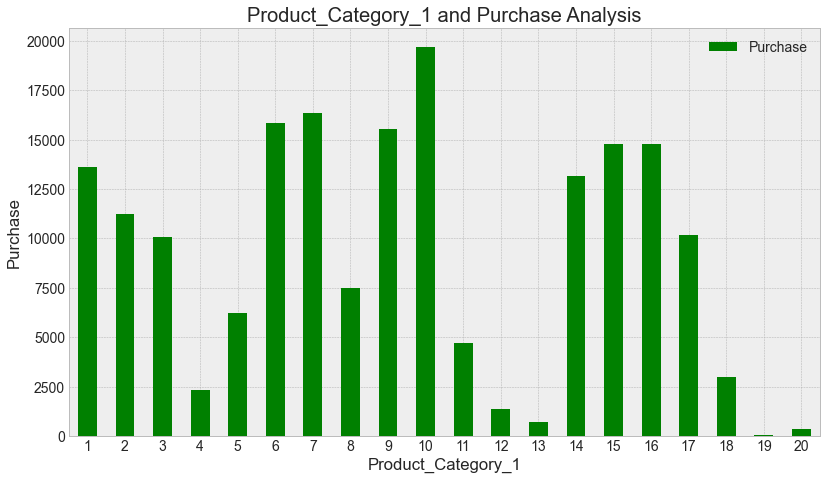

In [63]:
Product_category_1_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

Although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.


In [64]:
gender_pivot = train.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)
gender_pivot

,Purchase
Gender,
F,8734.565765
M,9437.526040


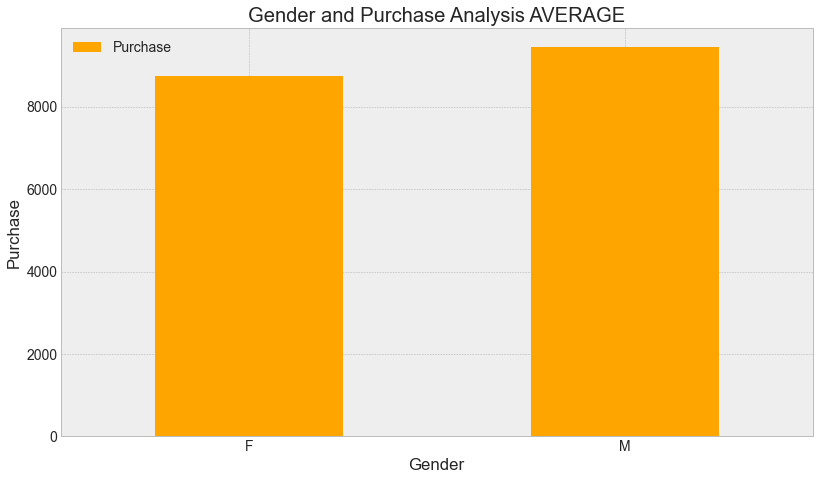

In [65]:
gender_pivot.plot(kind='bar', color='orange',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis " "AVERAGE")
plt.xticks(rotation=0)
plt.show()

On average the male gender spends more money on purchase contrary to female, and also the percentage of male buyers is higher than female buyers

In [66]:
age_pivot = train.pivot_table(index='Age', values="Purchase", aggfunc=np.sum)
age_pivot

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403
51-55,367099644
55+,200767375


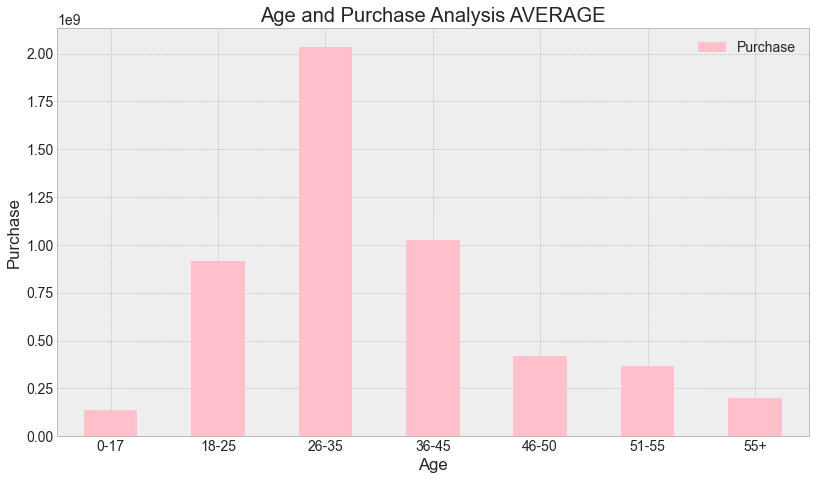

In [67]:
age_pivot.plot(kind='bar', color='pink',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis " "AVERAGE")
plt.xticks(rotation=0)
plt.show()

Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.


In [68]:
city_pivot = train.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)
city_pivot

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


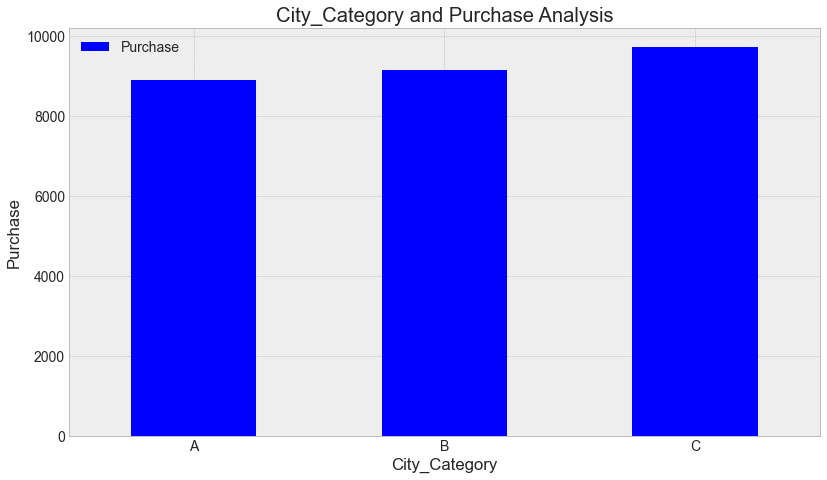

In [69]:
city_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()


We saw previously that city type ‘B’ had the highest number of purchases registered. However, the city whose buyers spend the most is city type ‘C’.

In [70]:
Stay_In_Current_City_Years_pivot = train.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)
Stay_In_Current_City_Years_pivot

,Purchase
Stay_In_Current_City_Years,
0,9180.075123
1,9250.145923
2,9320.429810
3,9286.904119
4+,9275.598872


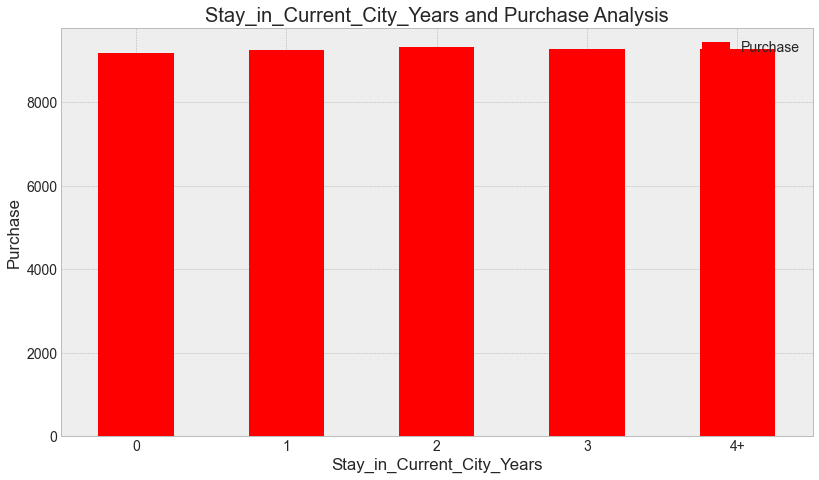

In [71]:
Stay_In_Current_City_Years_pivot.plot(kind='bar', color='red',figsize=(12,7))
plt.xlabel("Stay_in_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_in_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

Again, we see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.



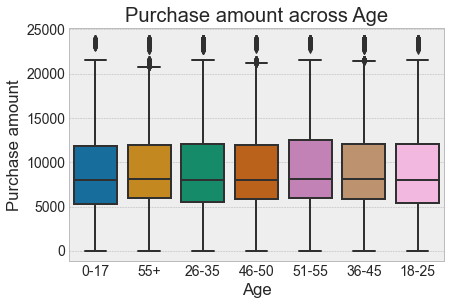

In [76]:
# Creating a boxplot of 'Age vs Purchase'
plt.style.use('bmh')
sns.boxplot(train['Age'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Age')
plt.xlabel('Age')
plt.ylabel('Purchase amount')
plt.show()

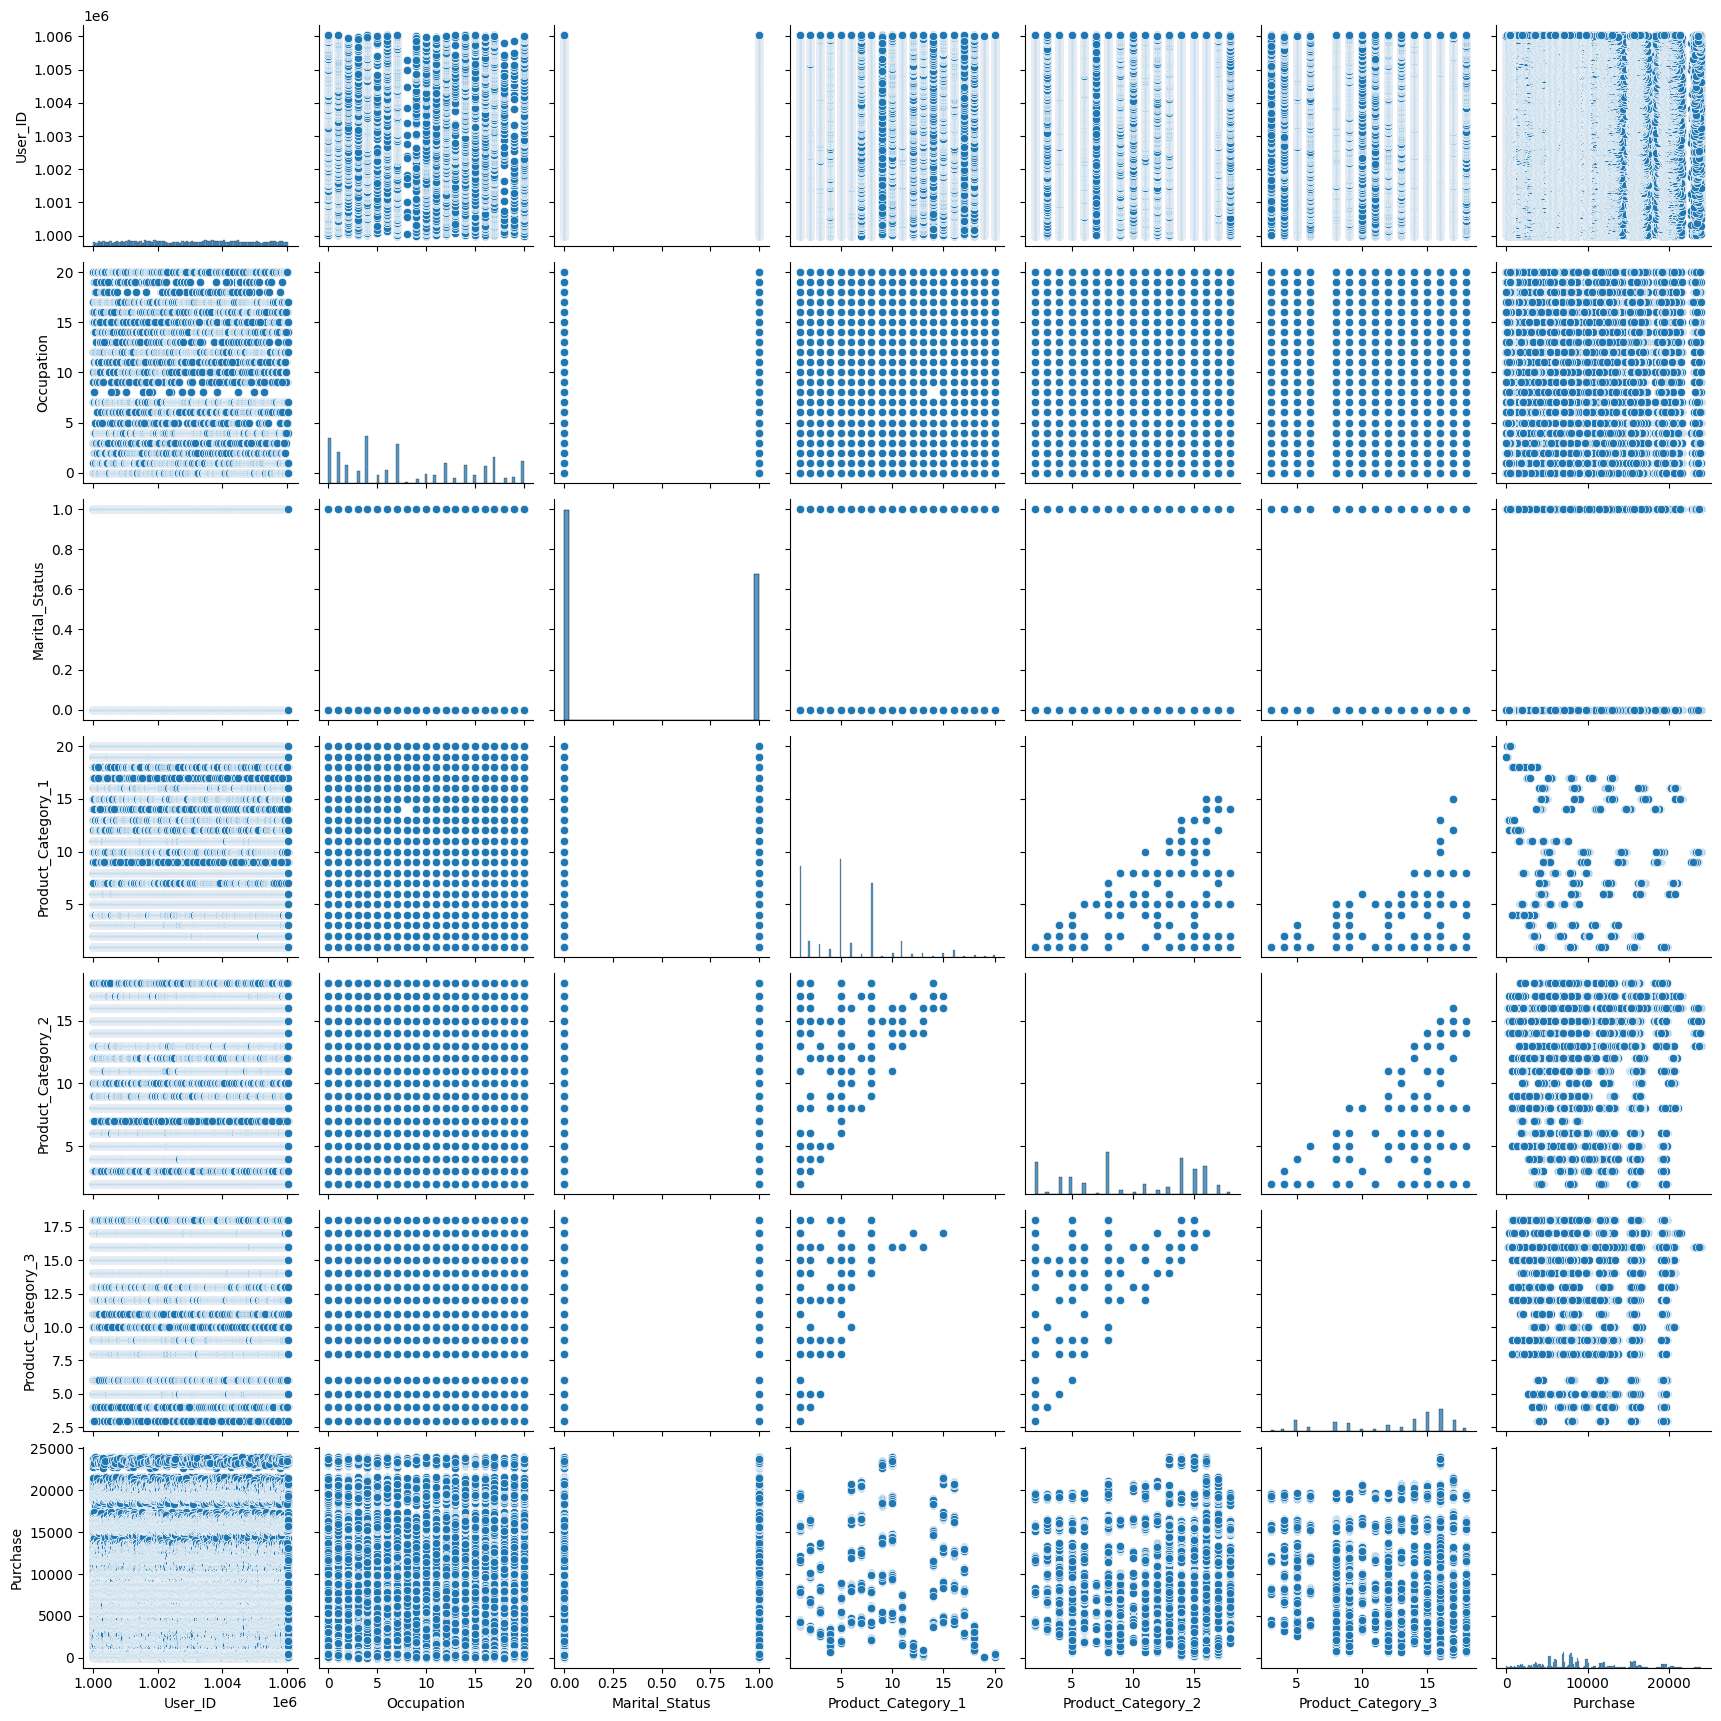

In [77]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(train)
plt.show()

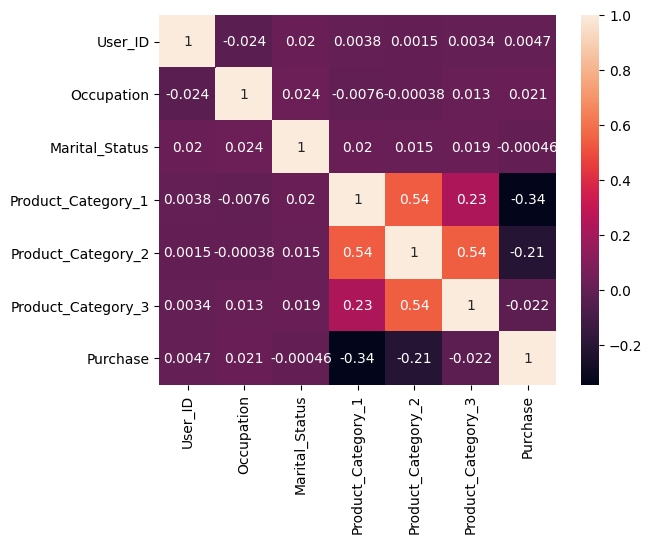

In [78]:
# Creating a heatmap of correlation matrix
sns.heatmap(train.corr(), annot = True)
plt.show()

# Observations

An interesting observation can be made from the gender distribution plot that the number of females was less than the number of men who shopped during Black Friday.

From the correlation heatmap, we can observe that the dependent feature 'Purchase' is highly correlated with 'Product_Category_1' and 'Product_Category_2'.


## Step 3: Data preprocessing

### 3.1: Merging of train and test

In [213]:
train['source'] = 'train'
test['source'] = 'test'

In [214]:
dataset = pd.concat([train, test])

### 3.2: Replacing '+' in 'Age' and 'Stay_In_Current_City_Years'

In [215]:
dataset['Age'] = dataset['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [216]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

### 3.3: Dropping irrelevant features

In [217]:
dataset.drop('Product_Category_3', axis = 1, inplace = True)

In [218]:
dataset.drop('User_ID', axis = 1, inplace = True)

In [219]:
dataset.drop('Product_ID', axis = 1, inplace = True)

### 3.4: Feature Encoding

In [220]:
from sklearn.preprocessing import LabelEncoder

In [221]:
label_encoder_gender = LabelEncoder()
dataset['Gender'] = label_encoder_gender.fit_transform(dataset['Gender'])

In [222]:
label_encoder_age = LabelEncoder()
dataset['Age'] = label_encoder_age.fit_transform(dataset['Age'])

In [223]:
label_encoder_city = LabelEncoder()
dataset['City_Category'] = label_encoder_city.fit_transform(dataset['City_Category'])

### 3.5: Fixing null values in 'Product_Category_2' 

In [224]:
dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median(), inplace = True)

### 3.6: Convert 'Stay_In_Current_City_Years' into numeric data type

In [225]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype('int')

### 3.7 Outliers removal

In [226]:
from scipy import stats
z=np.abs(stats.zscore(train['Purchase']))
Thresold=2.33
np.where(z>2.33)
train=train[z<2.33]

<AxesSubplot:xlabel='Purchase'>

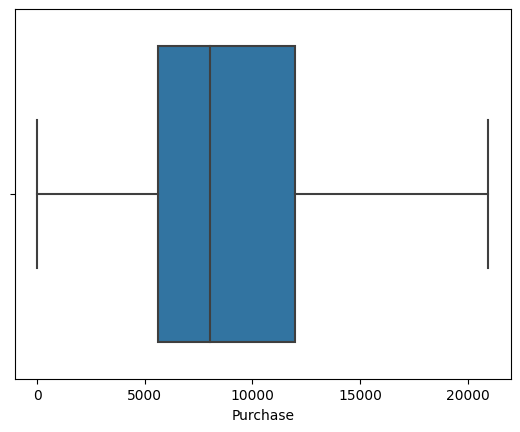

In [227]:
sns.boxplot(train['Purchase'])#outliers removed

### 3.8: Separating dataset into train and test

In [228]:
train = dataset.loc[dataset['source'] == 'train']
test = dataset.loc[dataset['source'] == 'test']

In [229]:
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

### 3.9: Separating train into X and Y

In [230]:
X = train.drop("Purchase", axis = 1)

In [231]:
Y = train["Purchase"]

### 3.10: Feature Selection

In [232]:
from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()

In [233]:
selector.fit(X, Y)

ExtraTreesRegressor()

In [234]:
feature_imp = selector.feature_importances_

In [235]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 0.49
1 2.14
2 4.98
3 0.75
4 2.59
5 0.62
6 78.38
7 10.05


In [236]:
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

### 3.11: Feature Scaling

In [237]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [238]:
for col in X.columns:
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 3.12: Creating a train test split

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [240]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (440054, 5)
X_test shape: (110014, 5)
Y_train shape: (440054,)
Y_test shape: (110014,)


## Step 4: Data Modelling

### 4.1: Linear Regression

In [241]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [242]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [243]:
Y_pred_lin_reg = lin_reg.predict(X_test)

### 4.2: KNN Regression

In [244]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [245]:
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [246]:
Y_pred_knn = knn.predict(X_test)

### 4.3: Decision Tree Regression

In [247]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

In [248]:
dec_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [249]:
Y_pred_dec = dec_tree.predict(X_test)

### 4.4: Random Forest Regressor

In [250]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()

In [251]:
ran_for.fit(X_train, Y_train)

RandomForestRegressor()

In [252]:
Y_pred_ran_for = ran_for.predict(X_test)

### 4.5: XGB Regressor

In [253]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 42)

In [254]:
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [255]:
Y_pred_xgb = xgb.predict(X_test)

### 4.6: Gradient Boosting

In [256]:
from sklearn.ensemble import GradientBoostingRegressor

In [257]:
model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(X_train, Y_train)


GradientBoostingRegressor(max_depth=5)

In [258]:
y_pred = model.predict(X_test)


## Step 5: Model Evaluation

In [259]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [260]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_lin_reg)))
print("R2 score:", r2_score(Y_test, Y_pred_lin_reg))
print("Accuracy:",lin_reg.score(X_train,Y_train))

Linear Regression: 
RMSE: 4699.473872577099
R2 score: 0.12103412745405762
Accuracy: 0.12206673411190261


In [261]:
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_knn)))
print("R2 score:", r2_score(Y_test, Y_pred_knn))
print("Accuracy:",knn.score(X_train,Y_train))

KNN regression: 
RMSE: 3277.5735280929334
R2 score: 0.5724583579516003
Accuracy: 0.6155064475064502


In [262]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_dec)))
print("R2 score:", r2_score(Y_test, Y_pred_dec))
print("Accuracy:",dec_tree.score(X_train,Y_train))

Decision tree regression: 
RMSE: 3065.3053014874595
R2 score: 0.6260435684244932
Accuracy: 0.6844145616530886


In [263]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_ran_for)))
print("R2 score:", r2_score(Y_test, Y_pred_ran_for))
print("Accuracy:",ran_for.score(X_train,Y_train))

Random forest regression: 
RMSE: 3032.896042921121
R2 score: 0.6339093954063011
Accuracy: 0.6831382156895014


In [264]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb))
print("Accuracy:",xgb.score(X_train,Y_train))

XGB regression: 
RMSE: 2981.4912381187014
R2 score: 0.646214027661014
Accuracy: 0.6595695481270749


In [265]:
print("Gradient Boosting: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred)))
print("R2 score:", r2_score(Y_test, y_pred))
print("Accuracy:",model.score(X_train,Y_train))

Gradient Boosting: 
RMSE: 3000.3129262664306
R2 score: 0.6417331374982578
Accuracy: 0.6507959394582259


## Step 6: Hyperparameter tuning

In [266]:
from sklearn.model_selection import RandomizedSearchCV

In [267]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

In [268]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [269]:
xgb_tune = XGBRegressor(verbosity = 0, random_state = 42)

In [270]:
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, random_state = 42)

In [271]:
xgb_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [272]:
xgb_cv.best_score_

0.651279037438864

In [273]:
xgb_cv.best_params_

{'min_child_weight': 66,
 'max_depth': 11,
 'learning_rate': '1.0',
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [274]:
xgb_best = XGBRegressor(colsample_bytree = 0.7, gamma = 0.3, learning_rate = 1.0, max_depth = 11, min_child_weight = 66, verbosity = 0, random_state = 42)

In [275]:
xgb_best.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1.0, max_delta_step=0, max_depth=11,
             min_child_weight=66, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [276]:
Y_pred_xgb_best = xgb_best.predict(X_test)

In [277]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_best)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb_best))
print("Accuracy:",xgb_best.score(X_train,Y_train))

XGB regression: 
RMSE: 2985.7347397680496
R2 score: 0.6452062368494103
Accuracy: 0.6635608599438318



<h3 style="font-family:verdana;"> Conclusion:</h3>

build a model using various algorithms such as Linear regression, KNN regression, Decision tree regression, Random forest,Gradient Boosting and XGB regressor to get the best possible prediction.

The XGB regressor gives us the best rmse value and r2 score for this problem but the accuracy is lower than hyperparameter tuned.Decision Tree has the highest accuracy.


 

In [278]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t          RootMeanSquareError  \t\t R2 Score  \t\t   Accuracy of the model") 
print("""Linear Regression       \t\t {:.2f} \t\t {:.4f} \t\t\t{:.4f}""".format(  np.sqrt(mean_squared_error(Y_test, Y_pred_lin_reg)),r2_score(Y_test, Y_pred_lin_reg),lin_reg.score(X_train,Y_train)))
print("""KNN regression       \t\t\t {:.2f} \t\t {:.4f} \t\t\t{:.4f}""".format(  np.sqrt(mean_squared_error(Y_test, Y_pred_knn)),r2_score(Y_test, Y_pred_knn),knn.score(X_train,Y_train)))
print("""Decision tree regression       \t\t {:.2f} \t\t {:.4f} \t\t\t{:.4f}""".format(  np.sqrt(mean_squared_error(Y_test, Y_pred_dec)),r2_score(Y_test, Y_pred_dec),dec_tree.score(X_train,Y_train)))
print("""Random forest regression    \t\t {:.2f} \t\t {:.4f} \t\t\t{:.4f}""".format(  np.sqrt(mean_squared_error(Y_test,  Y_pred_ran_for)),r2_score(Y_test, Y_pred_ran_for),ran_for.score(X_train,Y_train)))
print("""Gradient Boosting    \t\t\t {:.2f} \t\t {:.4f} \t\t\t{:.4f}""".format(  np.sqrt(mean_squared_error(Y_test, y_pred)),r2_score(Y_test, y_pred),model.score(X_train,Y_train)))
print("""XGB regression      \t\t\t {:.2f} \t\t {:.4f} \t\t\t{:.4f}""".format(  np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)),r2_score(Y_test, Y_pred_xgb),xgb.score(X_train,Y_train)))
print("""XGB regression(after Hyp)\t\t {:.2f} \t\t {:.4f} \t\t\t{:.4f}""".format(  np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_best)),r2_score(Y_test,Y_pred_xgb_best),xgb_best.score(X_train,Y_train)))

Model			          RootMeanSquareError  		 R2 Score  		   Accuracy of the model
Linear Regression       		 4699.47 		 0.1210 			0.1221
KNN regression       			 3277.57 		 0.5725 			0.6155
Decision tree regression       		 3065.31 		 0.6260 			0.6844
Random forest regression    		 3032.90 		 0.6339 			0.6831
Gradient Boosting    			 3000.31 		 0.6417 			0.6508
XGB regression      			 2981.49 		 0.6462 			0.6596
XGB regression(after Hyp)		 2985.73 		 0.6452 			0.6636
